In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/BrainNetCNN"

os.chdir(path)
os.listdir(path)

Mounted at /content/drive


['Dataset', '——', 'BrainNetCNN', 'Experiment_v4', 'drive', 'Untitled0.ipynb']

In [7]:
import numpy as np
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.initializers import RandomNormal
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [8]:
(trainX, trainy), (testX, testy) = load_data()

trainX = trainX.astype('float32')[:10000].reshape(-1,28,28,1)
testX = testX.astype('float32')[:3000].reshape(-1,28,28,1)

# scale from [0,255] to [-1,1]
trainX = (trainX - 127.5) / 127.5
testX = (testX - 127.5) / 127.5

trainy = trainy[:10000]
testy = testy[:3000]

print(trainy[0])
trainX.shape

5


(10000, 28, 28, 1)

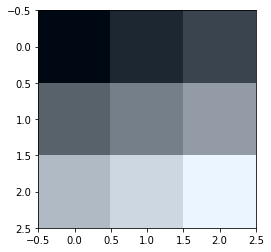

In [21]:
a = np.arange(27).reshape(3,3,3)
a = a/26 *255
a = a.astype(np.int)
a
plt.imshow(a)

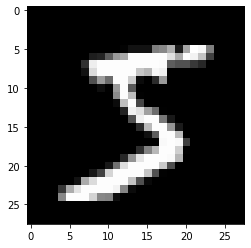

In [11]:
plt.imshow(trainX[0].reshape(28,28), 'gray')

In [ ]:
def define_model(in_shape=(28,28,1)):
  # weight initialization
  init = RandomNormal(stddev=0.02)

  model = Sequential()

  # downsample to 14x14
  model.add(Conv2D(32, (4,4), strides=(2,2), padding='same', input_shape=in_shape))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))

  # downsample to 7x7
  model.add(Conv2D(64, (4,4), strides=(2,2), padding='same'))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))   

  model.add(Flatten())
  model.add(Dense(128))

  model.add(Dense(10, activation='softmax'))

  model.summary()
  opt = Adam(lr=0.001)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['acc'])
  return model

In [ ]:
batch_size = 32

model1 = define_model()
history = model1.fit(trainX, trainy,
            epochs=30,
            batch_size=batch_size,
            shuffle=True)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 32)        544       
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          32832     
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)             

In [ ]:
model1.evaluate(testX, testy)

94/94 [==============================] - 0s 2ms/step - loss: 0.2112 - acc: 0.9650


[0.21117688715457916, 0.9649999737739563]